In [10]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
# %matplotlib notebook
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [9, 6]
cmap = matplotlib.cm.get_cmap('inferno')

fnames = ['results/results-bsc.csv', 'results/results-bsc-serial.csv', 'results/results-bsc-cuda.csv', 'results/results-bsc-cuda-1g.csv']
results = [pd.read_csv(open(fname, 'rb')) for fname in fnames]

In [2]:
# good = results[results['throughput']>0.8e8]
# for c in good['command']: print(c)

In [3]:
# best (cpu parallel) -b1 -m3 -cf -e0 -H10 -M4
# lzbench_options = ' -b25 -m. -cf -e1 -H15 -M128'
# lzbench_options_better = ' -b25 -m3 -cf -e0 -H10 -M4'
# results_lzbench = results[results['command'].str.contains(lzbench_options)]
# results_lzbench_cuda = results_cuda[results_cuda['command'].str.contains(lzbench_options)]
# results_lzbench_better = results[results['command'].str.contains(lzbench_options_better)]

def fastest(df):
    return df.iloc[df['throughput'].idxmax()]

def plot(results, colors, fnames):
    for res, c, fname in zip(results, colors, fnames):
        plt.plot(res['ratio'], res['throughput'],
                 linestyle='', marker='o', markersize=2, color=c, label=fname)

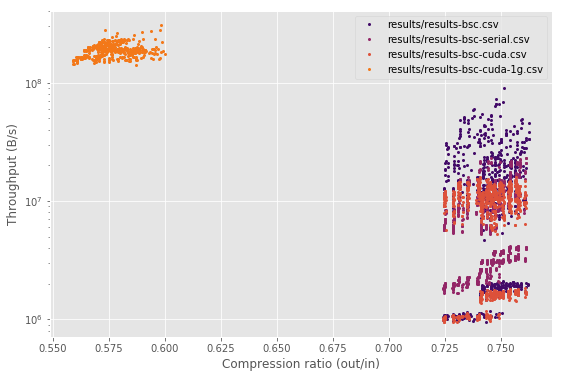

In [11]:
colors = [cmap(0.2), cmap(0.4), cmap(0.6), cmap(0.7)]
# plt.plot(results['ratio'], results['throughput'],
#          linestyle='', marker='o', markersize=2, color=colors[0], label='CPU, parallel')
# plt.plot(results_serial['ratio'], results_serial['throughput'],
#          linestyle='', marker='o', markersize=2, color=colors[1], label='CPU, serial')
# plt.plot(results_cuda['ratio'], results_cuda['throughput'],
#          linestyle='', marker='o', markersize=2, color=colors[2], label='GPU')
# plt.plot(results_lzbench['ratio'], results_lzbench['throughput'],
#          linestyle='', marker='x', markersize=22, color='black', label='lzbench params, CPU, parallel')
# plt.plot(results_lzbench_cuda['ratio'], results_lzbench_cuda['throughput'],
#          linestyle='', marker='+', markersize=24, color='black', label='lzbench params, GPU')
# plt.plot(results_lzbench_better['ratio'], results_lzbench_better['throughput'],
#          linestyle='', marker='x', markersize=24, color='gray', label='lzbench, best params except bs')
# plt.hlines([
#         results['throughput'].max(),
#         results_serial['throughput'].max(),
#         results_cuda['throughput'].max(),
#     ], 0.72, 0.765)
# plt.axhline(results['throughput'].max(), c=colors[0], lw=2, label='max(CPU parallel)')
# plt.axhline(results_serial['throughput'].max(), c=colors[1], lw=2, label='max(CPU serial)')
# plt.axhline(results_cuda['throughput'].max(), c=colors[2], lw=2, label='max(GPU)')

plot(results, colors, fnames)

plt.yscale('log')
plt.xlabel('Compression ratio (out/in)')
plt.ylabel('Throughput (B/s)')
plt.legend()
plt.show()

In [23]:
res = results[3].sort_values('throughput', ascending=False).head(10)
res

,command,ratio,throughput
57,bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 ...,0.598265,3.045845e+08
111,bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 ...,0.597845,2.778294e+08
308,bsc e minbias-cut.dat minbias-cut.dat.bsc -b25...,0.573365,2.763904e+08
75,bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 ...,0.593773,2.720458e+08
117,bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 ...,0.589705,2.679950e+08
291,bsc e minbias-cut.dat minbias-cut.dat.bsc -b25...,0.578736,2.611856e+08
81,bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 ...,0.586351,2.530823e+08
414,bsc e minbias-cut.dat minbias-cut.dat.bsc -b25...,0.578142,2.469505e+08
134,bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 ...,0.576268,2.410754e+08
146,bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 ...,0.585638,2.358445e+08


In [25]:
res = results[2].sort_values('throughput', ascending=True).head(10)
res

,command,ratio,throughput
287,bsc e run.dat run.dat.bsc -b1 -m8 -cp -e1 -H28...,0.730512,949795.946990
240,bsc e run.dat run.dat.bsc -b1 -m7 -ca -e2 -H28...,0.728503,952006.316030
214,bsc e run.dat run.dat.bsc -b1 -m7 -cp -e2 -H28...,0.724487,957755.169679
215,bsc e run.dat run.dat.bsc -b1 -m7 -cp -e2 -H28...,0.724530,958077.585187
7,bsc e run.dat run.dat.bsc -b1 -m5 -cf -e0 -H28...,0.745291,964217.505874
26,bsc e run.dat run.dat.bsc -b1 -m5 -cf -e2 -H28...,0.729003,968201.868332
296,bsc e run.dat run.dat.bsc -b1 -m8 -cp -e2 -H28...,0.724318,981580.191057
152,bsc e run.dat run.dat.bsc -b1 -m6 -ca -e1 -H28...,0.731133,982063.898427
106,bsc e run.dat run.dat.bsc -b1 -m6 -cf -e2 -H28...,0.728811,988653.257079
133,bsc e run.dat run.dat.bsc -b1 -m6 -cp -e2 -H28...,0.724702,988668.215345


In [24]:
for c in res['command']:
    print(c)

bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 -m6 -cf -e0 -H15 -M4 -G
bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 -m7 -cf -e0 -H15 -M4 -G
bsc e minbias-cut.dat minbias-cut.dat.bsc -b25 -m6 -ca -e0 -H10 -M255 -G
bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 -m6 -cp -e0 -H15 -M4 -G
bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 -m7 -cf -e1 -H15 -M4 -G
bsc e minbias-cut.dat minbias-cut.dat.bsc -b25 -m6 -cp -e0 -H15 -M4 -G
bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 -m6 -cp -e1 -H15 -M4 -G
bsc e minbias-cut.dat minbias-cut.dat.bsc -b25 -m8 -ca -e0 -H10 -M4 -G
bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 -m7 -cp -e1 -H10 -M255 -G
bsc e minbias-cut.dat minbias-cut.dat.bsc -b1 -m7 -ca -e0 -H10 -M255 -G


In [6]:
# fastest(results_cuda)['command']

In [7]:
# results_good = results[results['throughput']>0.6e8]
# for c in results_good['command']:
#     print(c.replace('bsc e run.dat run.dat.bsc', ''))

In [8]:
# results_bad = results[results['throughput']<4e6]
# for c in results_bad['command']:
#     print(c.replace('bsc e run.dat run.dat.bsc', ''))